In [1]:
import random
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint
import torch
import torchvision

from ipywidgets import *
from IPython.display import display

device = "cpu"

%matplotlib inline

In [2]:
# indices = list(range(1, 16))
# choice = str(random.choice(indices))
# print("Choice:", choice)
choice = str(13)

rgb_img_ext = choice + "_rgb.png"
depth_img_ext = choice + "_depth.png"
depth_arr_ext = choice + "_depth.npy"

folders = os.listdir("frames")
folders = list(map(lambda folder: os.path.join("frames", folder), folders))
triplets = []
for folder in folders:
    rgb_im_path = os.path.join(folder, rgb_img_ext)
    depth_im_path = os.path.join(folder, depth_img_ext)
    depth_arr_path = os.path.join(folder, depth_arr_ext)
    
    rgb_img = cv2.imread(rgb_im_path, cv2.IMREAD_COLOR)     # BGR image
    depth_img = cv2.imread(depth_im_path, cv2.IMREAD_COLOR) # BGR image
    depth_arr = np.load(depth_arr_path)
    triplets.append((rgb_img, depth_img, depth_arr))
    
print("Number of triplets:", len(triplets))

Number of triplets: 8


In [3]:
def convert_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def enhance_contrast(image):
    return cv2.equalizeHist(image)

def apply_filter(image, kernel):
    return cv2.filter2D(image, ddepth=-1, kernel=kernel)

def avg_blur(ksize=9):
    def apply_avg_blur(image):
        print("Applying average blur with ksize:", (ksize,ksize))
        return cv2.blur(image, ksize=(ksize,ksize))
    return apply_avg_blur

def median_blur(ksize=10):
    def apply_median_blur(image):
        print("Applying median blur with ksize:", (ksize,ksize))
        return cv2.medianBlur(img, ksize=(ksize,ksize))
    return apply_median_blur

def bilateral_filter(d=9, sigmaColor=75, sigmaSpace=75):
    def apply_bilateral_filter(image):
        print("Applying bilateral filter with d: {}, sigmaColor: {}, sigmaSpace: {}".format((ksize,ksize), sigmaColor, sigmaSpace))
        return cv2.bilateralFilter(image, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
    return apply_bilateral_filter

def gaussian_blur(ksize=5, sigma=3):
    def apply_gaussian_blur(image):
        print("Applying gaussian blur with ksize: {}, sigma: {}".format((ksize,ksize), sigma))
        return cv2.GaussianBlur(image, ksize=(ksize,ksize), sigmaX=sigma)
    return apply_gaussian_blur

def canny(thresh1=0, thresh2=23):
    def apply_canny(image):
        print("Applying canny with thresh1: {}, thresh2: {}".format(thresh1, thresh2))
        return cv2.Canny(image, threshold1=thresh1, threshold2=thresh2)
    return apply_canny

avg_blur = interactive(avg_blur, ksize=(1,20))
median_blur = interactive(median_blur, ksize=(1,20))
bilateral_filter = interactive(bilateral_filter, d=(1,20), sigmaColor=(1,100), sigmaSpace=(1,100))
gaussian_blur = interactive(gaussian_blur, ksize=(1,20), sigma=(1,20))
canny = interactive(canny, thresh1=(0,100), thresh2=(0,100))

def show_image(img, h=10, w=10):
    plt.figure(figsize=(w,h))
    plt.imshow(img)
    plt.show()

def show_image_pairs(left, right, h=15, w=15):
    f, ax = plt.subplots(1,2)
    f.set_figheight(h)
    f.set_figwidth(w)
    ax[0].imshow(left)
    ax[1].imshow(right)
    plt.show()

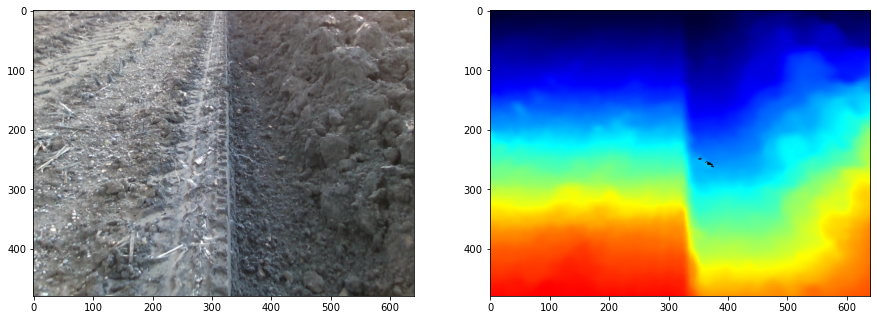

In [4]:
# indices = list(range(8))
# choice = str(random.choice(indices))
# print("Choice:", choice)
choice = 4

rgb_img, depth_img, depth_arr = triplets[choice]

show_image_pairs(rgb_img, depth_img)

# Preprocessing

In [11]:
# Requires re-execution after parameter adjustment

print("Average blur:")
display(avg_blur)

print("Median blur:")
display(median_blur)

print("Bilateral filter:")
display(bilateral_filter)

print("Gaussian blur:")
display(gaussian_blur)

print("Canny detector:")
display(canny)

pp_funcs = {
    "Grayscale": convert_grayscale,
    "Contrast": enhance_contrast,
    "Average Blur": avg_blur.result,
    "Median Blur": median_blur.result,
    "Bilateral Filter": bilateral_filter.result,
    "Gaussian Blur": gaussian_blur.result,
    
}

detect_funcs = {
    "Canny Edges": canny.result,
}

Average blur:


interactive(children=(IntSlider(value=9, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…

Median blur:


interactive(children=(IntSlider(value=10, description='ksize', max=20, min=1), Output()), _dom_classes=('widge…

Bilateral filter:


interactive(children=(IntSlider(value=9, description='d', max=20, min=1), IntSlider(value=75, description='sig…

Gaussian blur:


interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), IntSlider(value=15, description=…

Canny detector:


interactive(children=(IntSlider(value=75, description='thresh1'), IntSlider(value=100, description='thresh2'),…

In [7]:
style = {
    'description_width': 'initial'
}

preproccessing = SelectMultiple(
    options=pp_funcs.keys(),
    value=[],
    rows=len(pp_funcs.keys()),
    description='Preprocessing',
    disabled=False,
    style=style
)

detectors = SelectMultiple(
        options=detect_funcs.keys(),
        value=[],
        rows=len(detect_funcs.keys()),
        description='Detectors',
        disabled=False,
        style=style
)

selection = HBox([preproccessing, detectors])

display(selection)

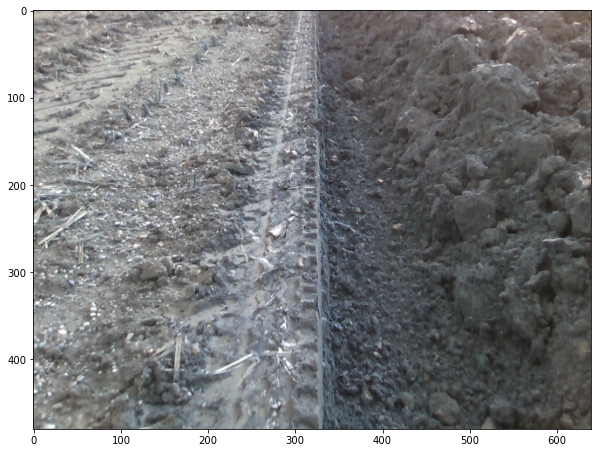

Applying gaussian blur with ksize: (5, 5), sigma: 15


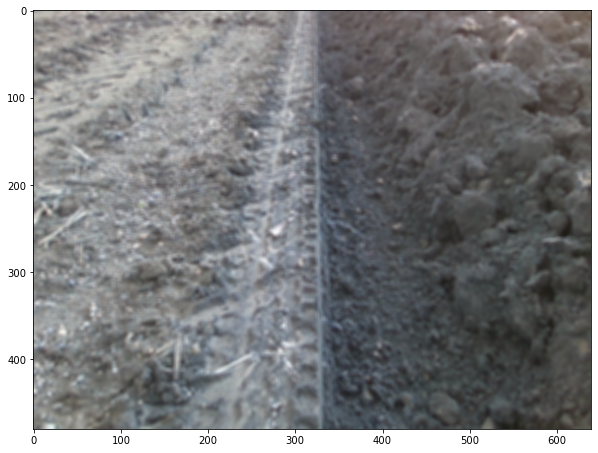

Applying canny with thresh1: 75, thresh2: 100


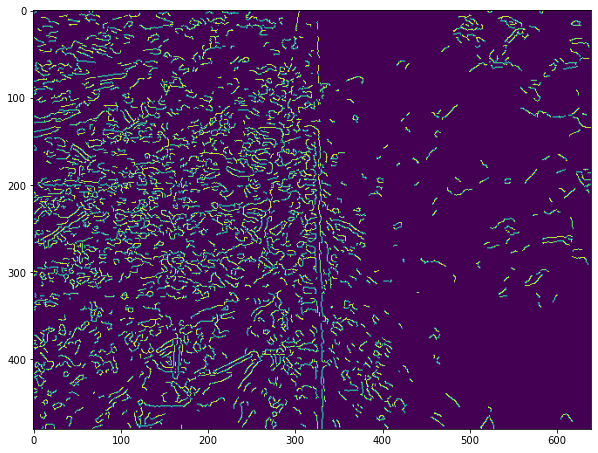

In [12]:
modified = rgb_img.copy() # Modify the deep copy of the original image
show_image(rgb_img)

for p in preproccessing.value:
    modified = pp_funcs[p](modified)
    show_image(modified)

for p in detectors.value:
    modified = detect_funcs[p](modified)
    show_image(modified)

# Feature Extraction

In [ ]:
print()

 # Help

In [ ]:
help(cv2.cvtColor)
help(cv2.filter2D)
help(cv2.blur)
help(cv2.medianBlur)
help(cv2.bilateralFilter)
help(cv2.GaussianBlur)
help(cv2.Canny)
help(cv2.equalizeHist)